# 1. Introduction
---
---

## 1.1 Problem Statement

Property investment is one of large sector in Thailand....
Bangkok condo market is comming back after Covid-19, people are looking for affordable condominuim price.

Opportunities:
- Pandemic situation is getting better
- Goverment policy that open for foreigners to invest in Thailand condominiums

Good for:
- My self, finding good condominium with reasonable price
- Investors, to find underpriced condominiums
- Developers, to consider which attributes could lead condominiums to be high value

## 1.2 Data Dictionary

# 2. Functions Preparation
---
---

## 2.1 Libraries Importation

In [2]:
# Import libraries

# General libraries
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Preprocessing and evaluation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn import metrics

# Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import xgboost



## 2.2 In-notebook Functions Creation

# 3. Data Preparation
---
---

## 3.1 Data Consolidation

In [2]:
df = pd.DataFrame()

# Set relative path for raw data folder
relative_path = ".\selenium\scrape_data"

# Get file names in folder as a list
file_names = os.listdir(relative_path)

# Iterate raw csv files in folder
for file_name in file_names:
    try: 
        temp_df = pd.read_csv(f"{relative_path}\\{file_name}")
        df = pd.concat([df, temp_df])
    except:
        # Print error file name
        print(file_name)

## 3.2 Data Cleansing

### 3.2.1 Duplication Removal

In [3]:
# Check data shape
# There are 1020 rows and 21 features from raw datas
df.shape

(1020, 21)

In [4]:
# Check duplicate data
# Dataset contains 8 duplicate rows, we can drop it.
df.duplicated().sum()

8

In [5]:
# Drop duplicate rows and check result
df.drop_duplicates(inplace=True)
df.shape

(1012, 21)

In [6]:
# Reset index after dropping duplicate rows
df = df.reset_index(drop=True)

In [7]:
# Check index head
df.head(2)

,dev,address,district,sale_price,rent_price,internal_feature_keys,internal_feature_values,external_feature_keys,exteranal_feature_values,description,...,amenity_keys,amenity_values,neighbor_cats,neighbor_names,neighbor_distances,asking_price,asking_price_change_quater,asking_price_change_year,gross_rental_yield,rental_price_change_year
0,H Sukhumvit 43,"Soi Phrom Mit, Khlong Toei Nuea, Vadhana, Bang...",Watthana,12000000.0,57000.0,Bedrooms|Bathrooms|Internal area,2|2|59,Floors|Towers|Project Area|Year built,"32|1|3,080 m2|2014",PropertyScout ID 954486\nCheck all listing det...,...,Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|True|True|False|False...,marker marker-bts|marker marker-bts|marker mar...,Phrom Phong|Thong Lo|Sukhumvit|Asok 4 Toll Pla...,830 m / 10 minutes by foot|1.5 km / 8 minutes ...,"195,125",0.0,0.74,4.67,-6.06
1,A Space I.D. Asoke - Ratchada,"Thanon Din Daeng, Din Daeng, Bangkok 10400",Ratchathewi,4639200.0,15000.0,Bedrooms|Bathrooms|Internal area,1|1|33,Floors|Towers|Year built,30|1|2016,PropertyScout ID 954280\nCheck all listing det...,...,Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|True|True|True|False|...,marker marker-mrt|marker marker-mrt|marker mar...,Phraram Kao 9|Phra Ram 9|Asok 2 Toll Plaza|Aso...,710 m / 9 minutes by foot|740 m / 9 minutes by...,"126,979",0.0,11.06,4.16,4.51


In [8]:
# Check index tail
df.tail(2)

,dev,address,district,sale_price,rent_price,internal_feature_keys,internal_feature_values,external_feature_keys,exteranal_feature_values,description,...,amenity_keys,amenity_values,neighbor_cats,neighbor_names,neighbor_distances,asking_price,asking_price_change_quater,asking_price_change_year,gross_rental_yield,rental_price_change_year
1010,Beverly 33,"Soi Daeng Udom, Khlong Toei Nuea, Vadhana, Ban...",Watthana,5790000.0,NaN,Bedrooms|Bathrooms|Internal area,1|1|40,Floors|Towers|Project Area|Year built,"8|1|1,232 m2|2012",This condo on Sukhumvit 33 for sale with 1 bed...,...,Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|False|True|False|Fals...,marker marker-bts|marker marker-bts|marker mar...,Phrom Phong|Asok|Sukhumvit|Asok 3 Toll Plaza|A...,660 m / 8 minutes by foot|1.2 km / 9 minutes b...,"163,696",0.0,7.34,4.65,33.68
1011,NaN,NaN,Watthana,7700000.0,NaN,Bedrooms|Bathrooms|Internal area,2|2|66.17,NaN,NaN,This 2-bedroom condo in Thonglor on a high flo...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2.2 Features Preparation
From scraping process, some features were collected as list of features due to uncertainty of the features occurrence that make .csv unable to store it in one column. 
<br>In-order-that, a list of features were joined by `|` to be a single string.

For example, column `internal_feature_keys` and `internal_feature_values` contain information of `number of bedrooms`, `number of bathrooms`, and `internal area` together as
<br>`bedrooms|bathrooms|internal area`.

**Hence, this section is to split the joined features to be ready for analyzing.**

In [9]:
df.head(2)

,dev,address,district,sale_price,rent_price,internal_feature_keys,internal_feature_values,external_feature_keys,exteranal_feature_values,description,...,amenity_keys,amenity_values,neighbor_cats,neighbor_names,neighbor_distances,asking_price,asking_price_change_quater,asking_price_change_year,gross_rental_yield,rental_price_change_year
0,H Sukhumvit 43,"Soi Phrom Mit, Khlong Toei Nuea, Vadhana, Bang...",Watthana,12000000.0,57000.0,Bedrooms|Bathrooms|Internal area,2|2|59,Floors|Towers|Project Area|Year built,"32|1|3,080 m2|2014",PropertyScout ID 954486\nCheck all listing det...,...,Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|True|True|False|False...,marker marker-bts|marker marker-bts|marker mar...,Phrom Phong|Thong Lo|Sukhumvit|Asok 4 Toll Pla...,830 m / 10 minutes by foot|1.5 km / 8 minutes ...,"195,125",0.0,0.74,4.67,-6.06
1,A Space I.D. Asoke - Ratchada,"Thanon Din Daeng, Din Daeng, Bangkok 10400",Ratchathewi,4639200.0,15000.0,Bedrooms|Bathrooms|Internal area,1|1|33,Floors|Towers|Year built,30|1|2016,PropertyScout ID 954280\nCheck all listing det...,...,Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|True|True|True|False|...,marker marker-mrt|marker marker-mrt|marker mar...,Phraram Kao 9|Phra Ram 9|Asok 2 Toll Plaza|Aso...,710 m / 9 minutes by foot|740 m / 9 minutes by...,"126,979",0.0,11.06,4.16,4.51


In [10]:
# def split funciton
def split_feature(string):
    try:
        return string.split("|")
    except:
        return None

In [11]:
# List of joined feature column names
joined_features = ['internal_feature_keys', 'internal_feature_values', 'external_feature_keys', 'exteranal_feature_values',
                  'amenity_keys', 'amenity_values', 'neighbor_cats', 'neighbor_names', 'neighbor_distances']

# Iterate column names to create list
for feature in joined_features:
    df[feature] = df[feature].apply(split_feature)

In [12]:
# Check result
df.head(2)

,dev,address,district,sale_price,rent_price,internal_feature_keys,internal_feature_values,external_feature_keys,exteranal_feature_values,description,...,amenity_keys,amenity_values,neighbor_cats,neighbor_names,neighbor_distances,asking_price,asking_price_change_quater,asking_price_change_year,gross_rental_yield,rental_price_change_year
0,H Sukhumvit 43,"Soi Phrom Mit, Khlong Toei Nuea, Vadhana, Bang...",Watthana,12000000.0,57000.0,"[Bedrooms, Bathrooms, Internal area]","[2, 2, 59]","[Floors, Towers, Project Area, Year built]","[32, 1, 3,080 m2, 2014]",PropertyScout ID 954486\nCheck all listing det...,...,"[Elevator, Parking, 24-hours Security, CCTV, S...","[True, True, True, True, True, True, True, Fal...","[marker marker-bts, marker marker-bts, marker ...","[Phrom Phong, Thong Lo, Sukhumvit, Asok 4 Toll...","[830 m / 10 minutes by foot, 1.5 km / 8 minute...","195,125",0.0,0.74,4.67,-6.06
1,A Space I.D. Asoke - Ratchada,"Thanon Din Daeng, Din Daeng, Bangkok 10400",Ratchathewi,4639200.0,15000.0,"[Bedrooms, Bathrooms, Internal area]","[1, 1, 33]","[Floors, Towers, Year built]","[30, 1, 2016]",PropertyScout ID 954280\nCheck all listing det...,...,"[Elevator, Parking, 24-hours Security, CCTV, S...","[True, True, True, True, True, True, True, Tru...","[marker marker-mrt, marker marker-mrt, marker ...","[Phraram Kao 9, Phra Ram 9, Asok 2 Toll Plaza,...","[710 m / 9 minutes by foot, 740 m / 9 minutes ...","126,979",0.0,11.06,4.16,4.51


In [13]:
def restructure_feature(keyword, keys_series, values_series):
    """ Return value in values_list of given keyword that matched keys_list"""
    result_list = []
    for i in range(len(keys_series)):
        try:
            result_list.append(list(values_series)[i][list(keys_series)[i].index(keyword)])
        except:
            result_list.append(None)
    return result_list

In [14]:
# Restructure list to columns
# Internal features
df['bedrooms'] = restructure_feature('Bedrooms', df['internal_feature_keys'], df['internal_feature_values'])
df['bathrooms'] = restructure_feature('Bathrooms', df['internal_feature_keys'], df['internal_feature_values'])
df['internal_area'] = restructure_feature('Internal area', df['internal_feature_keys'], df['internal_feature_values'])

In [15]:
# Restructure list to columns
# External features
df['floors'] = restructure_feature('Floors', df['external_feature_keys'], df['exteranal_feature_values'])
df['towers'] = restructure_feature('Towers', df['external_feature_keys'], df['exteranal_feature_values'])
df['project_area'] = restructure_feature('Project Area', df['external_feature_keys'], df['exteranal_feature_values'])
df['year_built'] = restructure_feature('Year built', df['external_feature_keys'], df['exteranal_feature_values'])

In [16]:
# Restructure list to columns
# Amenities
df['has_elevator'] = restructure_feature('Elevator', df['amenity_keys'], df['amenity_values'])
df['has_parking'] = restructure_feature('Parking', df['amenity_keys'], df['amenity_values'])
df['has_security'] = restructure_feature('24-hours Security', df['amenity_keys'], df['amenity_values'])
df['has_cctv'] = restructure_feature('CCTV', df['amenity_keys'], df['amenity_values'])
df['has_pool'] = restructure_feature('Swimming Pool', df['amenity_keys'], df['amenity_values'])
df['has_sauna'] = restructure_feature('Sauna', df['amenity_keys'], df['amenity_values'])
df['has_gym'] = restructure_feature('Gym', df['amenity_keys'], df['amenity_values'])
df['has_garden_bbq'] = restructure_feature('Garden / BBQ', df['amenity_keys'], df['amenity_values'])
df['has_playground'] = restructure_feature("Playground / Kid's Area", df['amenity_keys'], df['amenity_values'])
df['has_shop_on_premise'] = restructure_feature('Shop on Premise', df['amenity_keys'], df['amenity_values'])
df['has_restaurant_on_premise'] = restructure_feature('Restaurant on Premise', df['amenity_keys'], df['amenity_values'])
df['has_wifi'] = restructure_feature('Wi-Fi', df['amenity_keys'], df['amenity_values'])

In [17]:
# Restructure list to columns
# neighborhood
df[['neighbor_cats', 'neighbor_names', 'neighbor_distances']]

,neighbor_cats,neighbor_names,neighbor_distances
0,"[marker marker-bts, marker marker-bts, marker ...","[Phrom Phong, Thong Lo, Sukhumvit, Asok 4 Toll...","[830 m / 10 minutes by foot, 1.5 km / 8 minute..."
1,"[marker marker-mrt, marker marker-mrt, marker ...","[Phraram Kao 9, Phra Ram 9, Asok 2 Toll Plaza,...","[710 m / 9 minutes by foot, 740 m / 9 minutes ..."
2,"[marker marker-bts, marker marker-mrt, marker ...","[Phrom Phong, Queen Sirikit National Conventio...","[1.4 km / 7 minutes by car, 1.7 km / 8 minutes..."
3,None,None,None
4,"[marker marker-bts, marker marker-bts, marker ...","[Phra Khanong, On Nut, Phra Khanong Toll Plaza...","[880 m / 4 minutes by car, 1.2 km / 12 minutes..."
...,...,...,...
1007,"[marker marker-bts, marker marker-bts, marker ...","[Thong Lo, Phrom Phong, Ekkamai, At Narong Tol...","[280 m / 4 minutes by foot, 1.1 km / 7 minutes..."
1008,"[marker marker-mrt, marker marker-expressway, ...","[Phetchaburi, Asok 2 Toll Plaza, Asok 4 Toll P...","[220 m / 3 minutes by foot, 800 m / 2 minutes ..."
1009,"[marker marker-bts, marker marker-mrt, marker ...","[Asok, Sukhumvit, Phrom Phong, Sukhumvit Toll ...","[630 m / 9 minutes by foot, 750 m / 10 minutes..."
1010,"[marker marker-bts, marker marker-bts, marker ...","[Phrom Phong, Asok, Sukhumvit, Asok 3 Toll Pla...","[660 m / 8 minutes by foot, 1.2 km / 9 minutes..."


**Neighborhood features have to be done more additional steps to split list to be columns.** 
<br>These features are about the top 6 nerest transportation facilities, which including city train(BTS and MRT), express way.
These features were captured by iteration of algorithm that made a length of list for each row 

Challenges:
1. Differece in number of value in list: 0 to 6
2. Differece in order of value in categorical list
3. Difference in type of facility
4. Difference in unit of measurement: meters, kilometers

**To simplify these features' situation, features will be cosidered as two types:**
1. Nearest distance between condominium and tranportation facilities
    - City train
    - Express way
2. Boolean features wheater condominium is closer than 1 km. to transportation facilities
    - City train
    - Express way

In [18]:
# define function that returns closet distance to transportation facilities

def distance_str_to_float(string):
    """Covert string distance to float and covert to meter"""
    if len(string) > 0:
        trim_str = string.split('/')[0].strip()
        if trim_str[-2:] == 'km':
            return float(trim_str[:-3]) * 1000
        elif trim_str[-1] == 'm':
            return float(trim_str[:-2])
    else:
        return None

def get_distance_citytrain(category_list, distance_list):
    """Fuction use with dataframe .apply or .map
    Return: distance of closest city train in meter unit"""
    if (category_list != None):
        if ('marker marker-bts' in category_list) or ('marker marker-mrt' in category_list):
            convert_distance_list = []
            # Iterate all value in list to find city train distances
            for i in range(len(category_list)):
                if category_list[i] in ['marker marker-bts', 'marker marker-mrt']:
                    # Convert string to distance
                    convert_distance = distance_str_to_float(distance_list[i])
                    # Append all bts/mrt distances
                    if convert_distance != None:
                        convert_distance_list.append(convert_distance)
            # return closest distance
            convert_distance_list.sort()
            return convert_distance_list[0]
    return None

def get_distance_expressway(category_list, distance_list):
    """Fuction use with dataframe .apply or .map
    Return: distance of closest express way in meter unit"""
    if (category_list != None):
        if ('marker marker-expressway' in category_list):
            convert_distance_list = []
            # Iterate all value in list to find city train distances
            for i in range(len(category_list)):
                if category_list[i] in ['marker marker-expressway']:
                    # Convert string to distance
                    convert_distance = distance_str_to_float(distance_list[i])
                    # Append all bts/mrt distances
                    if convert_distance != None:
                        convert_distance_list.append(convert_distance)
            # return closest distance
            convert_distance_list.sort()
            try:
                return convert_distance_list[0]
            except:
                return None
    return None

In [19]:
# Create transport facility distance columns
df['city_train_distance'] = df[['neighbor_cats', 'neighbor_distances']].apply(lambda x: get_distance_citytrain(x[0], x[1]), axis=1)
df['express_way_distance'] = df[['neighbor_cats', 'neighbor_distances']].apply(lambda x: get_distance_expressway(x[0], x[1]), axis=1)

# Create boolean columns if distance <= 1 km.
df['close_city_train'] = df['city_train_distance'].apply(lambda x: int(x <= 1000) if x != None else 0)
df['close_express_way'] = df['express_way_distance'].apply(lambda x: int(x <= 1000) if x != None else 0)

In [20]:
# Drop unused columns
df.drop(columns=joined_features, inplace=True)

In [21]:
df.head()

,dev,address,district,sale_price,rent_price,description,detail,asking_price,asking_price_change_quater,asking_price_change_year,...,has_gym,has_garden_bbq,has_playground,has_shop_on_premise,has_restaurant_on_premise,has_wifi,city_train_distance,express_way_distance,close_city_train,close_express_way
0,H Sukhumvit 43,"Soi Phrom Mit, Khlong Toei Nuea, Vadhana, Bang...",Watthana,12000000.0,57000.0,PropertyScout ID 954486\nCheck all listing det...,"Fully furnished 2 bedrooms, 2 bathrooms condom...","195,125",0.0,0.74,...,True,False,False,False,False,True,830.0,3600.0,1,0
1,A Space I.D. Asoke - Ratchada,"Thanon Din Daeng, Din Daeng, Bangkok 10400",Ratchathewi,4639200.0,15000.0,PropertyScout ID 954280\nCheck all listing det...,"Fully Fitted 1 bedroom, 1 bathroom condo for s...","126,979",0.0,11.06,...,True,True,False,False,False,True,710.0,910.0,1,1
2,Aguston Sukhumvit 22,"150/1 สุขุมวิท Khwaeng Khlong Toei, Khet Khlon...",Khlong Toei,15000000.0,NaN,PropertyScout ID 923172\nCheck all listing det...,"Modern 2-bedroom 2-bathroom Condo unit, sized ...","151,925",0.0,-4.70,...,True,True,True,False,False,True,1400.0,1900.0,0,0
3,KHUN by YOO inspired by Starck,"139 Soi Sukhumvit 55, Khwaeng Khlong Tan Nuea,...",Watthana,25000000.0,65000.0,PropertyScout ID 923585\nCheck all listing det...,"Modern 1-bedroom 1-bathroom Condo unit, sized ...","428,041",0.0,-11.55,...,True,True,True,True,True,True,NaN,NaN,0,0
4,Aspire Sukhumvit 48,"Soi Piya Watchara, Phra Khanong, Khlong Toei, ...",Khlong Toei,4500000.0,20000.0,PropertyScout ID 513916\nCheck all listing det...,"Fully furnished 2 bedrooms, 2 bathrooms condo ...","97,051",0.0,-7.54,...,True,False,False,False,False,True,880.0,1700.0,1,0


### 3.2.3 Missing Values and Data Types Check

In [22]:
# Check missing values
missing_df = pd.DataFrame({'n_missing': df.isnull().sum().sort_values(ascending=False)})
missing_df['pct_missing'] = round(missing_df['n_missing'] / len(df) * 100, 2)
missing_df[missing_df['n_missing'] > 0]

,n_missing,pct_missing
rent_price,875,86.46
project_area,430,42.49
year_built,154,15.22
has_playground,110,10.87
has_restaurant_on_premise,106,10.47
has_wifi,105,10.38
has_shop_on_premise,104,10.28
has_garden_bbq,98,9.68
has_sauna,97,9.58
has_elevator,86,8.50


**According to missing value table, missing values can be separated to 4 groups by number of missing and approach to fix them.**
1. **High percentage of missig data:**
    - Approch: Drop whole columns
    - `rent_price` : 86.46% missing
    - `project_area` : 42.49% missing
2. **Boolean columns (all amenity features):**
    - Approch: Treat missing data as 0 since absences of objects that unable to scrape could imply that condominiums do not have these fuctions.
3. **Columns that missing percentage less than or equal to 15%:**
    - `year_built` which has 15% of missing also considered
    - 2 approaches could be applied:
        - Drop missing rows
        - Impute median values
4.**Columns that do not need to fix:** Sice they are additional detail of codominiums.
    - `dev`
    - `address`
    - `detail`
    - `description`

In [23]:
# 1. Drop columns
df.drop(columns=['rent_price', 'project_area'], inplace=True)

In [24]:
# 2. Fill null with zero for boolean features
amenity_columns = df.columns[df.columns.str.contains('has')]
df[amenity_columns] = df[amenity_columns].fillna(value=0)

In [25]:
# 3. Columns that missing percentage less than or equal to 15%

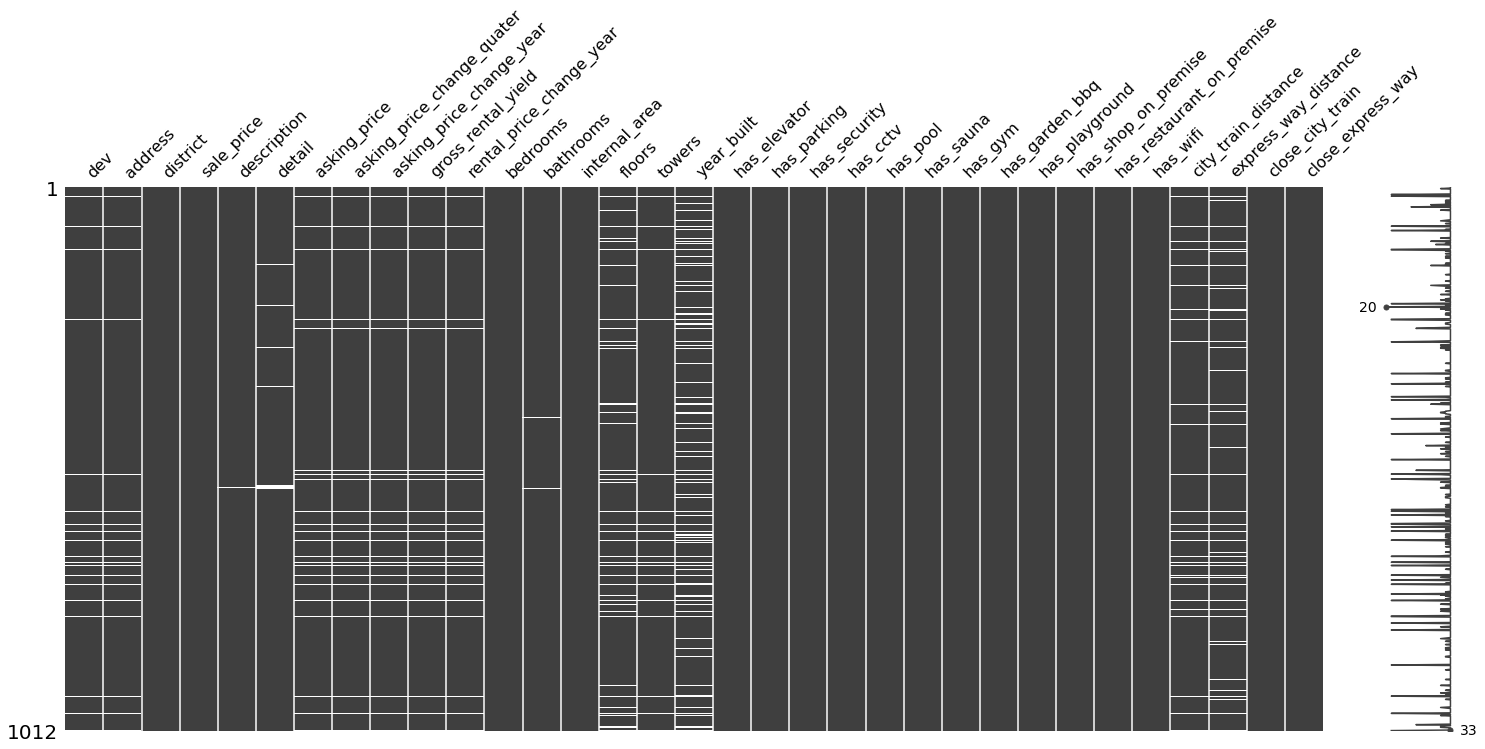

In [26]:
# Check missing values by missingno library to see patern and effect on missing data
msno.matrix(df);

**From missingno matrix**, data are likely to be missing on the same rows, which could imply that if we drop row that contain null, 
<br>data will be missing about 15% based on maxmimum percentage of missing values. 
<br>It also can implay that if we drop rows that missing one feature, the rest of features will be droped the same rows that have missing value.

In [27]:
# Check if we drop rows that contain missing value
len_df = df.shape[0]
len_drop_df = df.drop(columns=['dev', 'address', 'description', 'detail']).dropna().shape[0]
print(f"Original data: {len_df}")
print(f"Data after dropping null: {len_drop_df}")
print(f"Row loss: {len_df - len_drop_df}")
print(f"%Loss: {round((len_df - len_drop_df) / len_df * 100, 2)}")

Original data: 1012
Data after dropping null: 831
Row loss: 181
%Loss: 17.89


**If we drop null values**, data will be decreased 181 rows, which are 17.89% of original rows, and will be 831 rows totally.
<br>831 data are still accepctable for regression problem but we can also try to impute data.
<br> We will pause fixing missing values for a moment and cotinue again when we're doing model after train test spliting to avoid data leakage.


In [28]:
# Check missing values
missing_df = pd.DataFrame({'n_missing': df.isnull().sum().sort_values(ascending=False)})
missing_df['pct_missing'] = round(missing_df['n_missing'] / len(df) * 100, 2)
missing_df[missing_df['n_missing'] > 0]

,n_missing,pct_missing
year_built,154,15.22
floors,83,8.20
express_way_distance,75,7.41
city_train_distance,59,5.83
asking_price,50,4.94
asking_price_change_quater,50,4.94
asking_price_change_year,50,4.94
gross_rental_yield,50,4.94
rental_price_change_year,50,4.94
address,44,4.35


### 3.2.4 Data Type Check
Data were scraped as text without any transforming before saving to .csv, therefore we need to turn numeric features to be appropriate form.

In [29]:
df.dtypes

dev                            object
address                        object
district                       object
sale_price                    float64
description                    object
detail                         object
asking_price                   object
asking_price_change_quater    float64
asking_price_change_year      float64
gross_rental_yield            float64
rental_price_change_year       object
bedrooms                       object
bathrooms                      object
internal_area                  object
floors                         object
towers                         object
year_built                     object
has_elevator                   object
has_parking                    object
has_security                   object
has_cctv                       object
has_pool                       object
has_sauna                      object
has_gym                        object
has_garden_bbq                 object
has_playground                 object
has_shop_on_

#### 3.2.4.1 Type Casting

##### **`asking_price`**

In [30]:
# Cast 'asking_price' to be float
# 'asking_price' has ',' in each value, we need to remove it before casting
df['asking_price']

0       195,125
1       126,979
2       151,925
3       428,041
4        97,051
         ...   
1007    165,459
1008    156,451
1009    142,583
1010    163,696
1011        NaN
Name: asking_price, Length: 1012, dtype: object

In [31]:
# 'asking_price'
# Remove ','
df['asking_price'] = df['asking_price'].str.replace(',', '')

# Cast to float
df['asking_price'] = df['asking_price'].astype(float)

##### **`rental_price_change_year`**

In [32]:
# Cast 'rental_price_change_year' to be float
# 'rental_price_change_year' has '–' that represent of null value, we need to remove it.
df['rental_price_change_year'][df['rental_price_change_year'] == '–'][:5]

49    –
58    –
64    –
70    –
77    –
Name: rental_price_change_year, dtype: object

In [33]:
# 'rental_price_change_year'
# Remove '–'
df['rental_price_change_year'] = df['rental_price_change_year'].replace('–', None)

# Cast to float
df['rental_price_change_year'] = df['rental_price_change_year'].astype(float)

##### **`internal_area`**

Problem: After trying to cast `internal_area` as float, an error raised up that ',' was found in the feature.
<br>So, we need to explore more about the feature whether it was a mistake by scaping process or a mistake from the website itself.

In [34]:
# Find values of 'internal_area' that contain ','
df[['dev', 'sale_price', 'internal_area']][df['internal_area'].str.find(',') > 0]

,dev,sale_price,internal_area
42,Baan Siri 31,12597426.0,"11,746"
128,Belle Grand Rama 9,11700535.0,"36,049"
297,The ESSE Sukhumvit 36,20302257.0,"61,588"
475,Siamese Exclusive Queens,13401574.0,"44,814"
506,Rin House,3953437.0,"16,650"
544,Circle S Sukhumvit 12,7570135.0,"26,772"


**From the result above**, 6 rows incorrectly returned `internal_area`, which should be returned in square meter unit of room size.

**The possible reasons are:**
1. Incorrectly scraping problem
2. Incorrect input from the website

**Conclusion:** After revisiting the website, it was found that these 6 observations were reported as overall internal area but unable to find the correct internal area of each room because of varity numbers of internal infrastructures. Therefore, **they will be replaced as null and be imputed in the future process.**

In [35]:
# Get incorrect values' indexes
df[['dev', 'sale_price', 'internal_area']][df['internal_area'].str.find(',') > 0].index

Int64Index([42, 128, 297, 475, 506, 544], dtype='int64')

In [36]:
# Replace 'internal_area' by None
df.loc[[42, 128, 297, 475, 506, 544], 'internal_area'] = None

In [37]:
# Check result
df.loc[[42, 128, 297, 475, 506, 544], ['dev', 'sale_price', 'internal_area']]

,dev,sale_price,internal_area
42,Baan Siri 31,12597426.0,None
128,Belle Grand Rama 9,11700535.0,None
297,The ESSE Sukhumvit 36,20302257.0,None
475,Siamese Exclusive Queens,13401574.0,None
506,Rin House,3953437.0,None
544,Circle S Sukhumvit 12,7570135.0,None


In [38]:
# Now we can cast it as float
df['internal_area'] = df['internal_area'].astype(float)

##### **`bathrooms`, `bathrooms`, `floors`, `towers`, `year_built`**
These features can be casted directly without any error occurrence.

In [39]:
for feat in ['bedrooms', 'bathrooms', 'floors', 'towers', 'year_built']:
    df[feat] = df[feat].astype(float)

In [40]:
df.dtypes

dev                            object
address                        object
district                       object
sale_price                    float64
description                    object
detail                         object
asking_price                  float64
asking_price_change_quater    float64
asking_price_change_year      float64
gross_rental_yield            float64
rental_price_change_year      float64
bedrooms                      float64
bathrooms                     float64
internal_area                 float64
floors                        float64
towers                        float64
year_built                    float64
has_elevator                   object
has_parking                    object
has_security                   object
has_cctv                       object
has_pool                       object
has_sauna                      object
has_gym                        object
has_garden_bbq                 object
has_playground                 object
has_shop_on_

##### **`Boolean features`**
All boolean featurs, now are string, need to be interger.

In [41]:
df.columns[df.columns.str.contains('has')]

Index(['has_elevator', 'has_parking', 'has_security', 'has_cctv', 'has_pool',
       'has_sauna', 'has_gym', 'has_garden_bbq', 'has_playground',
       'has_shop_on_premise', 'has_restaurant_on_premise', 'has_wifi'],
      dtype='object')

In [42]:
# List columns that need to be interger
boolean_features = df.columns[df.columns.str.contains('has')]

# Check if features are unable to be casted
for feat in boolean_features:
    try:
        df[feat].astype(int)
    except:
        print('Unable to cast:', feat)

Unable to cast: has_elevator
Unable to cast: has_parking
Unable to cast: has_security
Unable to cast: has_cctv
Unable to cast: has_pool
Unable to cast: has_sauna
Unable to cast: has_gym
Unable to cast: has_garden_bbq
Unable to cast: has_playground
Unable to cast: has_shop_on_premise
Unable to cast: has_restaurant_on_premise
Unable to cast: has_wifi


**After tring to cast boolean features as int, errors were raised.** 

In [43]:
# Check values inside boolean feature
df['has_pool'].unique()

array(['True', 0, 'False'], dtype=object)

It was found out that values 'True' and 'False' as string were not treated as `Boolean`. To cast these features, we need to use condition to check context for these string.

In [44]:
for feat in boolean_features:
    df[feat] = df[feat].apply(lambda x: 1 if x == 'True' else 0)

##### **`Final feature data types`**

In [45]:
# Check final data types
df.dtypes

dev                            object
address                        object
district                       object
sale_price                    float64
description                    object
detail                         object
asking_price                  float64
asking_price_change_quater    float64
asking_price_change_year      float64
gross_rental_yield            float64
rental_price_change_year      float64
bedrooms                      float64
bathrooms                     float64
internal_area                 float64
floors                        float64
towers                        float64
year_built                    float64
has_elevator                    int64
has_parking                     int64
has_security                    int64
has_cctv                        int64
has_pool                        int64
has_sauna                       int64
has_gym                         int64
has_garden_bbq                  int64
has_playground                  int64
has_shop_on_

#### 3.2.4.2 Missing Values Re-check
After fixing all data types, number of missing values will be increased from some strings removal process.
<br>**Let's re-check missing values again.**

In [46]:
# Check missing values
missing_df = pd.DataFrame({'n_missing': df.isnull().sum().sort_values(ascending=False)})
missing_df['pct_missing'] = round(missing_df['n_missing'] / len(df) * 100, 2)
missing_df[missing_df['n_missing'] > 0]

,n_missing,pct_missing
year_built,154,15.22
floors,83,8.20
rental_price_change_year,78,7.71
express_way_distance,75,7.41
city_train_distance,59,5.83
asking_price,50,4.94
asking_price_change_quater,50,4.94
asking_price_change_year,50,4.94
gross_rental_yield,50,4.94
address,44,4.35


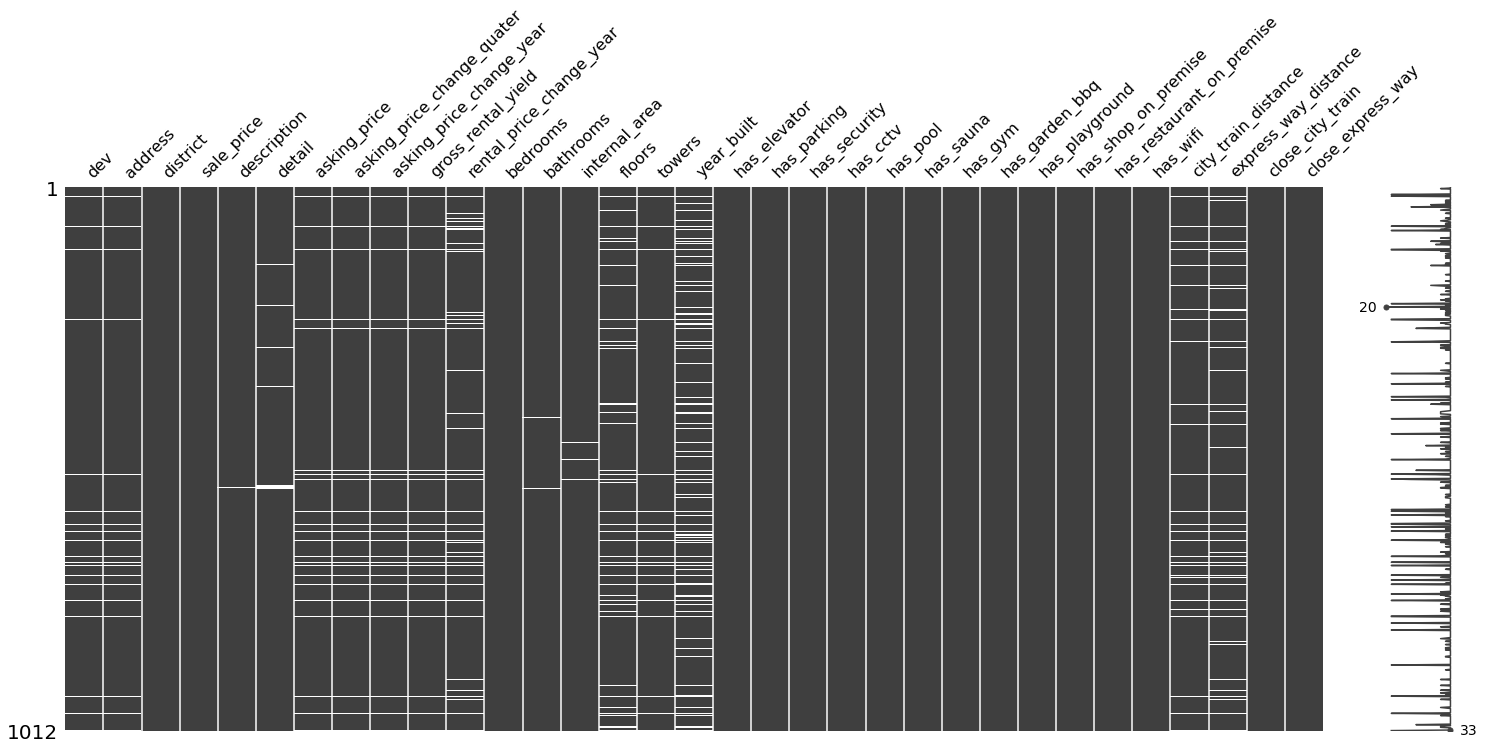

In [47]:
# Check missing values by missingno library to see patern and effect on missing data
msno.matrix(df);

In [48]:
# Check if we drop rows that contain missing value
len_df = df.shape[0]
len_drop_df = df.drop(columns=['dev', 'address', 'description', 'detail']).dropna().shape[0]
print(f"Original data: {len_df}")
print(f"Data after dropping null: {len_drop_df}")
print(f"Row loss: {len_df - len_drop_df}")
print(f"%Loss: {round((len_df - len_drop_df) / len_df * 100, 2)}")

## Original result
# Original data: 1012
# Data after dropping null: 831
# Row loss: 181
# %Loss: 17.89

Original data: 1012
Data after dropping null: 817
Row loss: 195
%Loss: 19.27


**As per result,** if we drop rows that contain null value, data loss increase from 181 rows to 195 rows, which is equivalent to 19.27% loss.
<br> 817 remaining observations are still reasonable to solve a regression problem.

**Now we decided to leave a missing values handeling for a moment and move through EDA section to understand data behavior before going to impute or remove it.**

In [115]:
# Save clean dataframe as csv to re-use it
# df.to_csv('./data/condominium_price_clean.csv', index=False)

# 4. EDA
---
---

In [3]:
# Read saved csv file
# df = pd.read_csv('./data/condominium_price_clean.csv')

In [118]:
df.columns[df.columns.str.contains('has|close')]

Index(['has_elevator', 'has_parking', 'has_security', 'has_cctv', 'has_pool',
       'has_sauna', 'has_gym', 'has_garden_bbq', 'has_playground',
       'has_shop_on_premise', 'has_restaurant_on_premise', 'has_wifi',
       'close_city_train', 'close_express_way'],
      dtype='object')

In [119]:
# Set numeric features' column names
numeric_features = [
    'asking_price', 'asking_price_change_quater', 'asking_price_change_year',
    'gross_rental_yield', 'rental_price_change_year', 'bedrooms',
    'bathrooms', 'internal_area', 'floors', 'towers', 'year_built',
    'city_train_distance', 'express_way_distance']

categorical_features = [
    'bedrooms', 'bathrooms',
    'has_elevator', 'has_parking', 'has_security', 'has_cctv', 'has_pool',
    'has_sauna', 'has_gym', 'has_garden_bbq', 'has_playground',
    'has_shop_on_premise', 'has_restaurant_on_premise', 'has_wifi',
    'close_city_train', 'close_express_way']

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sale_price,1012.0,1.663035e+07,1.958215e+07,1900000.00,7.000000e+06,1.070000e+07,18325626.75,2.204167e+08
asking_price,962.0,1.666305e+05,7.740526e+04,42893.00,1.094750e+05,1.488770e+05,202173.00,4.654460e+05
asking_price_change_quater,962.0,6.612786e-01,8.149279e+00,-57.21,0.000000e+00,0.000000e+00,0.00,5.290000e+01
asking_price_change_year,962.0,2.934948e+00,1.427497e+01,-79.81,-2.850000e+00,2.900000e-01,6.60,1.656600e+02
gross_rental_yield,962.0,4.145759e+00,1.072789e+00,0.00,3.792500e+00,4.235000e+00,4.59,1.171000e+01
rental_price_change_year,934.0,1.853266e+00,1.291348e+01,-55.74,-4.850000e+00,1.310000e+00,6.68,6.469000e+01
bedrooms,1012.0,1.637352e+00,8.236779e-01,1.00,1.000000e+00,1.000000e+00,2.00,5.000000e+00
bathrooms,1010.0,1.618812e+00,8.680216e-01,1.00,1.000000e+00,1.000000e+00,2.00,5.000000e+00
internal_area,1005.0,1.122526e+02,9.040249e+01,18.57,5.100000e+01,7.880000e+01,140.00,6.300000e+02
floors,929.0,2.885684e+01,1.579932e+01,5.00,1.600000e+01,2.900000e+01,38.00,7.700000e+01


## 4.1 Outlier Check

Skewness: 5.02567242610581


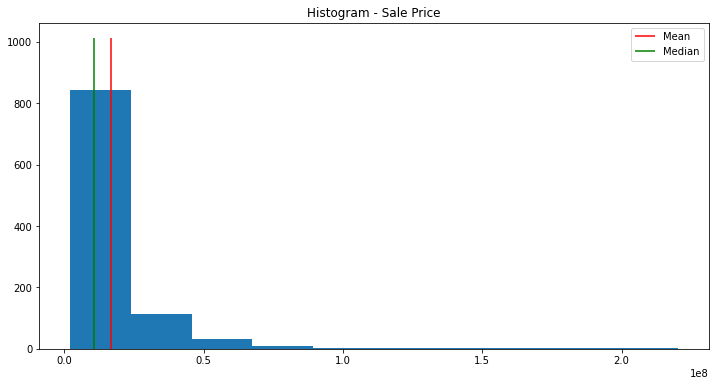

In [48]:
# Plot sale_price distribution.

print('Skewness:', df['sale_price'].skew())

plt.figure(figsize=(12, 6))
plt.hist(df['sale_price'])
plt.vlines(df['sale_price'].mean(), ymin=0, ymax=df.shape[0], color='red', label='Mean')
plt.vlines(df['sale_price'].median(), ymin=0, ymax=df.shape[0], color='Green', label='Median')
plt.title('Histogram - Sale Price')
plt.legend();


## The saleprice distribution is right skew so we could normalize it by using log e

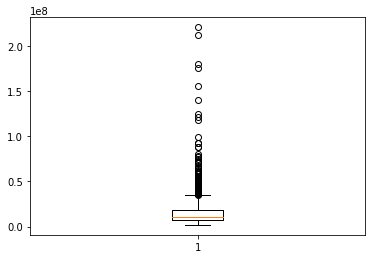

In [7]:
# Boxplot
plt.boxplot(df['sale_price']);

**Due to various characters of condominium and differences demand in each district,** condominium sale price range is extremely wide that made sale price variable has outlier values on the right hand side.

The effect of extremely wide sale price range could affect liner regression model more than other types of model.

**To minimize the effect on liner regression model we can:**
1. Remove some extreme outliers out from our dataset
2. Log transform sale price variable to normalize its scale

Skewness: 0.7042436247732304


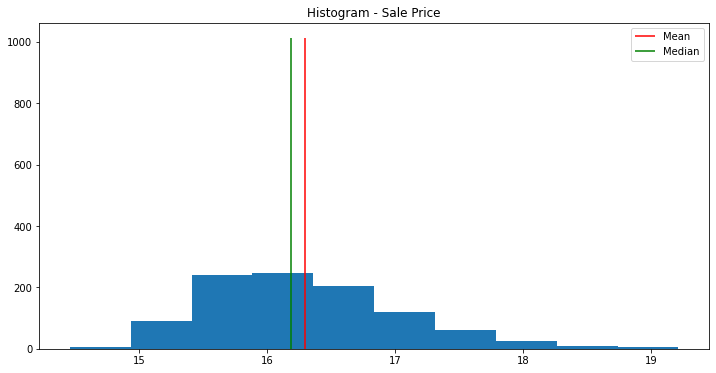

In [74]:
# Plot sale_price distribution.

print('Skewness:', np.log(df['sale_price']).skew())

plt.figure(figsize=(12, 6))
plt.hist(np.log(df['sale_price']))
plt.vlines(np.log(df['sale_price']).mean(), ymin=0, ymax=df.shape[0], color='red', label='Mean')
plt.vlines(np.log(df['sale_price']).median(), ymin=0, ymax=df.shape[0], color='Green', label='Median')
plt.title('Histogram - Sale Price')
plt.legend();


## The saleprice distribution is right skew so we could normalize it by using log e

**After `sale_price` log transformation,** its distribution looks more normal. comparing before and after transformation, skewness has reduced and histogram chart is also more normally distributed.

## 4.3 Correlation

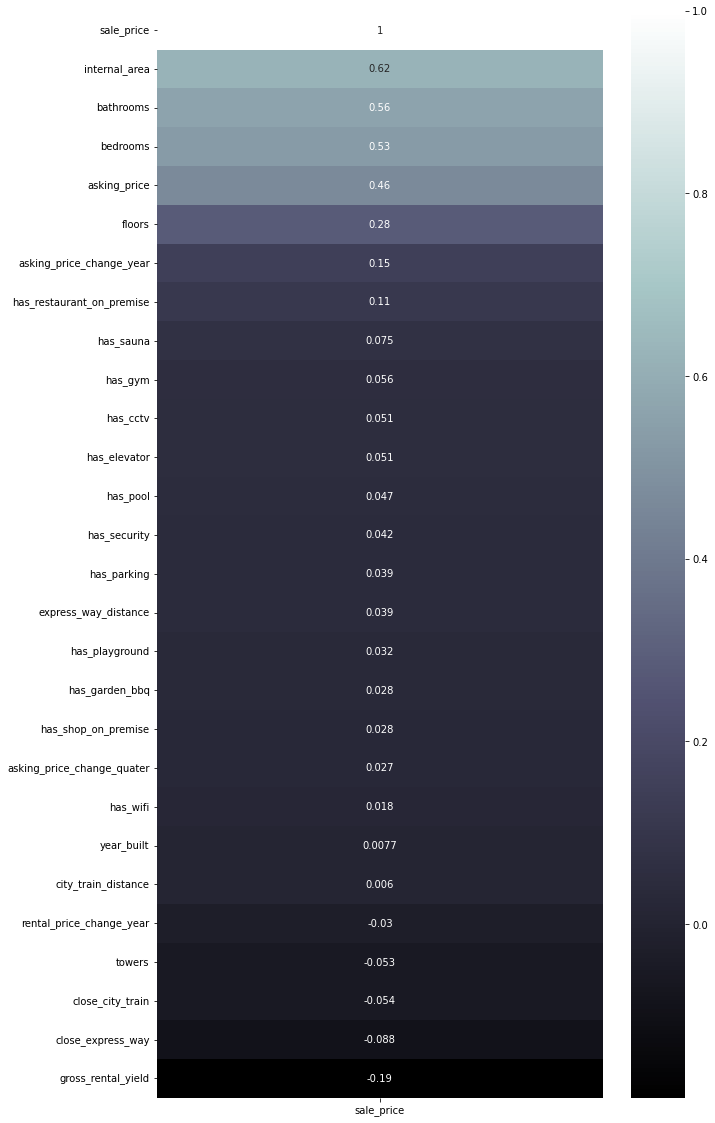

In [8]:
# Find correlation to sale_price
# Check correlation with saleprice
plt.figure(figsize=(10,20))
sns.heatmap(df.corr()[['sale_price']].sort_values(by='sale_price', ascending=False)
            , cmap='bone', annot=True);

## 4.4 Data Characteristic

### 4.4.1 Numeric Features

In [115]:
# Print each numeric features aggregate values

for feat in numeric_features:
    print(f"""
-------------- {feat} --------------""")
    print(df[feat].agg(['count', 'max', 'min', 'mean', 'median']))
    print("-------------------------------------")
    


-------------- asking_price --------------
count        962.000000
max       465446.000000
min        42893.000000
mean      166630.545738
median    148877.000000
Name: asking_price, dtype: float64
-------------------------------------

-------------- asking_price_change_quater --------------
count     962.000000
max        52.900000
min       -57.210000
mean        0.661279
median      0.000000
Name: asking_price_change_quater, dtype: float64
-------------------------------------

-------------- asking_price_change_year --------------
count     962.000000
max       165.660000
min       -79.810000
mean        2.934948
median      0.290000
Name: asking_price_change_year, dtype: float64
-------------------------------------

-------------- gross_rental_yield --------------
count     962.000000
max        11.710000
min         0.000000
mean        4.145759
median      4.235000
Name: gross_rental_yield, dtype: float64
-------------------------------------

-------------- rental_price_chan

To understand more about relationship of `sale_price` and numeric features, we will plot `sale_price` against each features.

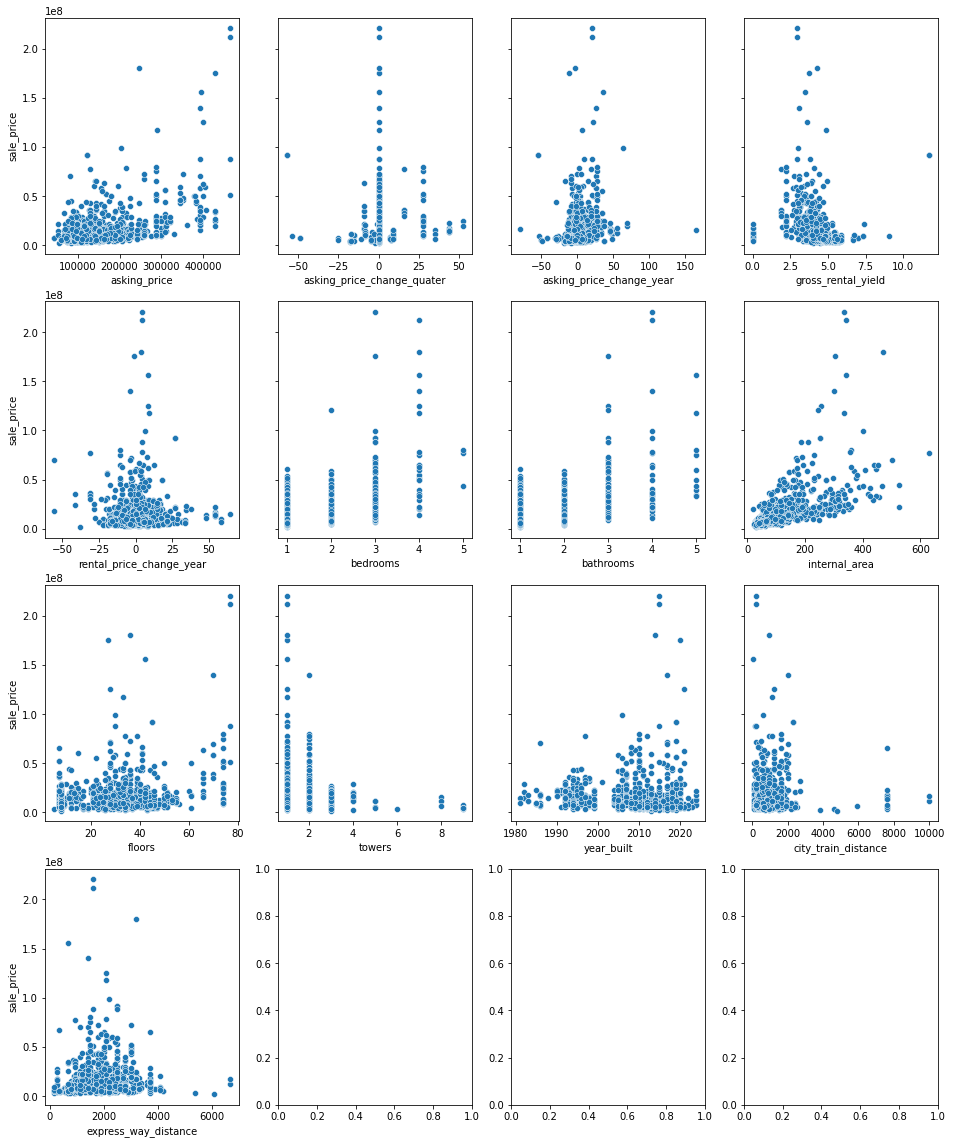

In [61]:
# Plot numeric features against saleprice.

fig, axes = plt.subplots(4, 4, figsize=(16,20))

for i, feat in enumerate(numeric_features): ## iterate column name
    x = i // 4
    y = i % 4
    pl = sns.scatterplot(
        ax=axes[x,y],
        x=feat,
        y='sale_price',
        data=df)
    if y != 0:
        pl.set(ylabel=None, yticklabels=[])  ## show label only the leftmost plot 

### 4.4.2 Categorical Features

In [116]:
def category_chart(data, features, target):
    """Create barcharts from iterating all categorical variables from 'x' list of variables 
    against y
    data = pd.DataFrame
    x = list of categorical variable name
    y = target variable"""
    # create subplots by number of x
    rows = math.ceil(len(features) / 4)
    fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))
    
    # iterate column name
    for i, feat in enumerate(features): 
        x = i // 4
        y = i % 4
        if len(features) <= 4:
            axs = axes[y]
        else:
            axs = axes[x, y]
        pl = sns.barplot(
            ax = axs,
            x = feat,
            y = target,
            data = data)
        if y != 0:
            pl.set(ylabel=None, yticklabels=[])  ## show label only the leftmost plot 

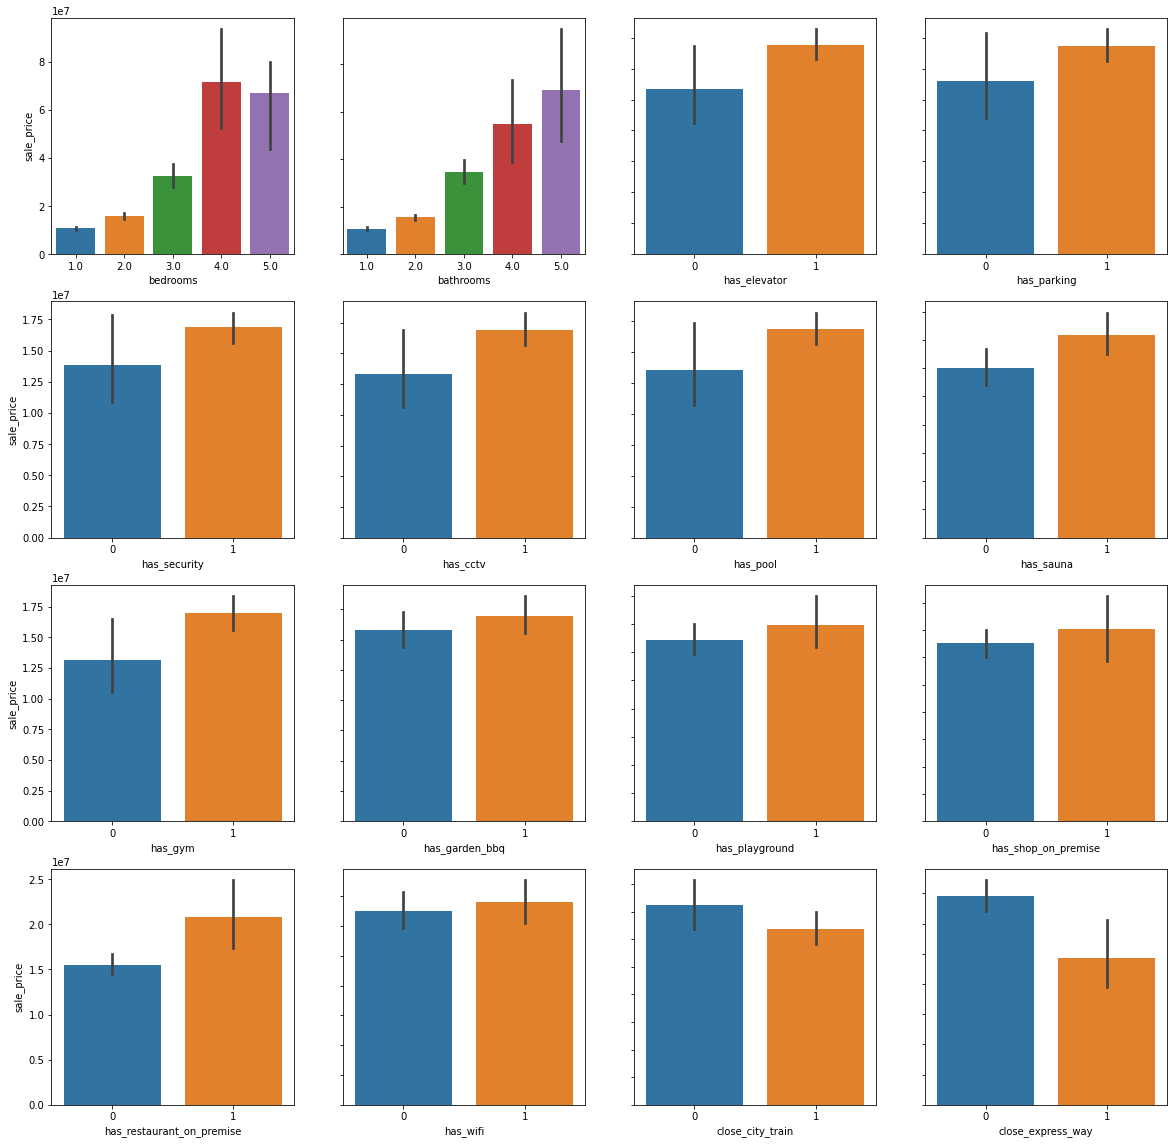

In [122]:
# Plot barchart vs. saleprice
category_chart(df, categorical_features, 'sale_price')

## 4.4 Feature Engineering

## 4.4.2 Data Preparation for Modeling

This part will create 3 types of dataframe to train models
1. Dataframe that drop all rows that contain missing values
2. Dataframe that impute missing values by each feature median
3. Dataframe that fill missing values by 0 -> Filling 0 to missing values is good for XGBoost model

In [4]:
# Create 3 dataframes
# Drop null rows
df_dropna = df.dropna().reset_index()

In [5]:
# Get dummy features by one hot encoder
oh = OneHotEncoder()

df_dummy_district = pd.DataFrame(oh.fit_transform(df_dropna[['district']]).toarray(),
                                 columns=oh.get_feature_names_out())


In [6]:
# Create X, y
features = [
    'asking_price', 'asking_price_change_quater',
    'asking_price_change_year', 'gross_rental_yield',
    'rental_price_change_year', 'bedrooms', 'bathrooms', 'internal_area',
    'floors', 'towers', 'year_built', 'has_elevator', 'has_parking',
    'has_security', 'has_cctv', 'has_pool', 'has_sauna', 'has_gym',
    'has_garden_bbq', 'has_playground', 'has_shop_on_premise',
    'has_restaurant_on_premise', 'has_wifi', 'city_train_distance',
    'express_way_distance', 'close_city_train', 'close_express_way'
]

X = df_dropna[features].merge(df_dummy_district, left_index=True, right_index=True)
y = df_dropna['sale_price']

# Train & test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# y log transformation
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# 5. Modeling and Evaluation
---
---

In [96]:
# create function to return model metrics

def r2_adj(y_true, y_pred):
    """Calcualte adjusted R^2"""
    return 1 - (1-metrics.r2_score(y_true, y_pred)) * (len(y) - 1 ) / (len(y) - X.shape[1] - 1)


def reg_metrics(trained_model, X_train=X_train, X_test=X_test
                , y_train=y_train, y_test=y_test, cross_val=True):
    """Return evaluation metrices of regression problems:
    """
    # Create metrics - train
    y_train_preds = trained_model.predict(X_train)
    train_mae = metrics.mean_absolute_error(y_train, y_train_preds)
    train_rmse = metrics.mean_squared_error(y_train, y_train_preds, squared=False)
    train_r2 = metrics.r2_score(y_train, y_train_preds)
    train_adj_r2 = r2_adj(y_train, y_train_preds)
    
    # Create metrics - test
    y_test_preds = trained_model.predict(X_test)
    test_mae = metrics.mean_absolute_error(y_test, y_test_preds)
    test_rmse = metrics.mean_squared_error(y_test, y_test_preds, squared=False)
    test_r2 = metrics.r2_score(y_test, y_test_preds)
    test_adj_r2 = r2_adj(y_test, y_test_preds)
    
    if cross_val == True:
        cross_train = cross_val_score(trained_model, X_train, y_train)
        cross_train_mean = cross_val_score(trained_model, X_train, y_train).mean()
    else:
        cross_train = None
        cross_train_mean = None
    
    print(f"""-----------Train Data-----------
MAE: {train_mae}
MSE: {train_rmse**2}
RMSE: {train_rmse}
R2: {train_r2}
Adj_R2: {train_adj_r2}
Cross Validation: {cross_train}
Cross Validation Mean: {cross_train_mean}
--------------------------------""")
    print(f"""-----------Test Data-----------
MAE: {test_mae}
MSE: {test_rmse**2}
RMSE: {test_rmse}
R2: {test_r2}
Adj_R2: {test_adj_r2}
--------------------------------""")

## 5.1 Linear Regression Based Models
To squeeze performance of linear regression based models, feature selection and feature engineering will paly important role of this section.

### Base Model
---

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
reg_metrics(lr)

-----------Train Data-----------
MAE: 4968874.852529523
MSE: 82993695361108.19
RMSE: 9110087.560562093
R2: 0.7718039578290121
Adj_R2: 0.7586445530380246
Cross Validation: [0.70357887 0.7499979  0.73147993 0.74407035 0.66656776]
Cross Validation Mean: 0.7191389612519221
--------------------------------
-----------Test Data-----------
MAE: 5085843.549645814
MSE: 57794955476346.63
RMSE: 7602299.354560213
R2: 0.7342435851533513
Adj_R2: 0.7189181824623256
--------------------------------


In [33]:
pd.Series(lr.coef_, index=X_train.columns).sort_values(ascending=False)[:10]

district_Bang Sue         1.081441e+07
district_Suan Luang       1.063011e+07
has_parking               6.114303e+06
district_Thon Buri        4.645235e+06
bathrooms                 4.478547e+06
district_Bang Kho Laem    3.983539e+06
gross_rental_yield        3.234683e+06
has_shop_on_premise       3.005715e+06
has_pool                  2.688848e+06
close_express_way         2.529838e+06
dtype: float64

### Linear Regression with Log Transformation
---

Using log `sale_price`

In [81]:
lr_log_y = LinearRegression()
lr_log_y.fit(X_train, y_train_log)

LinearRegression()

In [82]:
reg_metrics(lr_log_y, y_train=y_train_log, y_test=y_test_log)

-----------Train Data-----------
MAE: 0.17580020798115584
MSE: 0.052276462478356225
RMSE: 0.2286404655312708
R2: 0.9041774563274614
Adj_R2: 0.898651647780159
Cross Validation: [0.9020534  0.87022088 0.88091797 0.88724784 0.87715995]
Cross Validation Mean: 0.8835200082720348
--------------------------------
-----------Test Data-----------
MAE: 0.19378626022414971
MSE: 0.07262949896253408
RMSE: 0.26949860660592306
R2: 0.8446470134841917
Adj_R2: 0.835688256725744
--------------------------------


From log transformation of `sale_price`, a model performance is better comparing by R-squared.

## 5.2 Tree Based Models

### Random Forest
---

In [21]:
rfr = RandomForestRegressor(random_state=42)

rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
reg_metrics(rfr)

-----------Train Data-----------
MAE: 1168382.7402147835
MSE: 7750252765531.584
RMSE: 2783927.579074496
R2: 0.9786902246101474
Adj_R2: 0.9774613515863552
Cross Validation: [0.91140352 0.91376941 0.75060394 0.78650603 0.93014868]
Cross Validation Mean: 0.8584863157016954
--------------------------------
-----------Test Data-----------
MAE: 3165387.63
MSE: 36566148307685.984
RMSE: 6046994.981615744
R2: 0.8318592271780783
Adj_R2: 0.8221630358226857
--------------------------------


### Random Forest with Log Transformation
---
Using log `sale_price`

In [83]:
# Try log transformation
rfr_log = RandomForestRegressor(random_state=42)

rfr_log.fit(X_train, y_train_log)

RandomForestRegressor(random_state=42)

In [84]:
reg_metrics(rfr_log, y_train=y_train_log, y_test=y_test_log)

-----------Train Data-----------
MAE: 0.05640074720643443
MSE: 0.0059237739547452345
RMSE: 0.07696605715992755
R2: 0.9891417463697006
Adj_R2: 0.9885155823333531
Cross Validation: [0.93033716 0.91331634 0.91528149 0.90595748 0.92695271]
Cross Validation Mean: 0.9183690342208797
--------------------------------
-----------Test Data-----------
MAE: 0.1764816921210091
MSE: 0.07303216893992184
RMSE: 0.2702446464593181
R2: 0.8437857107840352
Adj_R2: 0.8347772851935995
--------------------------------


### Random Forest with GridSearch
---

In [28]:
# Set hyperparametesr
hyper_params = {'max_depth': [5, 10, 15],
                'min_samples_leaf': [2, 3, 4, 5],
                'n_estimators': [100, 200]
               }

# Instantiate GridSearchCV
rfr_gridsearch = GridSearchCV(RandomForestRegressor(),
                              hyper_params,
                              cv=5,
                              verbose=1
                             )

# Fit train data
rfr_gridsearch.fit(X_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [29]:
rfr_gridsearch.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}

In [97]:
reg_metrics(rfr_gridsearch, cross_val=False)

-----------Train Data-----------
MAE: 1570710.9979738628
MSE: 20137989648199.566
RMSE: 4487537.147277955
R2: 0.9446294141379692
Adj_R2: 0.941436352830067
Cross Validation: None
Cross Validation Mean: None
--------------------------------
-----------Test Data-----------
MAE: 3033180.639495315
MSE: 36928846034094.81
RMSE: 6076910.895684979
R2: 0.8301914475829735
Adj_R2: 0.8203990802089903
--------------------------------


### XGBoost
---

In [127]:
xgbr = xgboost.XGBRegressor(objective='reg:squarederror',
                            seed=42)

xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [128]:
reg_metrics(xgbr)

-----------Train Data-----------
MAE: 151933.275990099
MSE: 84786739125.82889
RMSE: 291181.6256665741
R2: 0.9997668738786373
Adj_R2: 0.999753430170459
Cross Validation: [0.8664426  0.91664223 0.75512167 0.67404597 0.95256816]
Cross Validation Mean: 0.8329641245313842
--------------------------------
-----------Test Data-----------
MAE: 3062259.538366337
MSE: 37520247578637.03
RMSE: 6125377.341734714
R2: 0.8274720276454215
Adj_R2: 0.8175228392003344
--------------------------------


In [133]:
xgbr_2 = xgboost.XGBRegressor(objective='reg:squarederror',
                            seed=42)

xgbr_2.fit(X_train, 
         y_train,
         eval_set=[(X_test, y_test)],
         verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [130]:
reg_metrics(xgbr_2)

-----------Train Data-----------
MAE: 151933.275990099
MSE: 84786739125.82889
RMSE: 291181.6256665741
R2: 0.9997668738786373
Adj_R2: 0.999753430170459
Cross Validation: [0.8664426  0.91664223 0.75512167 0.67404597 0.95256816]
Cross Validation Mean: 0.8329641245313842
--------------------------------
-----------Test Data-----------
MAE: 3062259.538366337
MSE: 37520247578637.03
RMSE: 6125377.341734714
R2: 0.8274720276454215
Adj_R2: 0.8175228392003344
--------------------------------


### XGBoost with GridSearch
---

In [ ]:
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[10000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  

In [ ]:
%%time
# Set hyperparametesr
hyper_params = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_alpha': [0, 1.0, 10.0],
    'reg_lambda': [0, 1.0, 10.0],
    'min_child_weight': [1.5, 6, 10],
    'subsample':[0.6, 0.90]  
}

xgbr_model = xgboost.XGBRegressor(objective='reg:squarederror',
                            seed=42)

# Instantiate GridSearchCV
xgbr_gridsearch = GridSearchCV(xgbr_model,
                              hyper_params,
                              cv=5,
                              verbose=1,
                              scoring='neg_mean_squared_error'
                              )

# Fit train data
xgbr_gridsearch.fit(X_train, y_train);

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


## 5.3 Neural Network Based Models
---

In [ ]:
# Scale data
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
# Insert model here...
model = Sequential()

# Hidden layer
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(32, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1, activation=None))

# Compile model (loss fuction optimzing)
model.compile(optimizer='adam',
              loss='mean_squared_error')

res = model.fit(X_train_sc, y_train,
                epochs=200,
                validation_data=(X_test_sc, y_test),
                verbose=0
         )

In [ ]:
plt.plot(res.history['loss'], label='Train Loss')
plt.plot(res.history['val_loss'], label='Validation Loss')
plt.legend();

## 5.4 Final Model

# 6. Additional Section
---
---

# 7. Summarization
---
---

## 7.2 Future Works

This project's model and dataset do not captured element of design which is one of main factor that could make impact on condominium value. So the next project would capture it by using condominium images to predict condominium price as well.